In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
airline_data = pd.read_csv('2008.csv')

In [3]:
print(airline_data.shape)
airline_data.head()

(7009728, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
airline_data.fillna(0, inplace=True)

In [5]:
# Check for non-numeric data types. Many of the non-numeric data types like carrier code etc. 
# do not really add any valueto the ArrDelay

airline_data.dtypes.value_counts()

float64    14
int64      10
object      5
dtype: int64

In [6]:
# Drop all of the object type columns
airline_data.drop(airline_data.select_dtypes(['object']), inplace=True, axis=1)

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
FlightNum            int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10)
memory usage: 1.3 GB


In [8]:
# Check if there are any negative values in the time columns

airline_data.lt(0).sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
FlightNum                  0
ActualElapsedTime          0
CRSElapsedTime            15
AirTime                    0
ArrDelay             3690606
DepDelay             3642076
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [9]:
round(airline_data.describe(), 1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,...,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0,7009728.0
mean,2008.0,6.4,15.7,3.9,1307.9,1326.1,1449.2,1494.8,2224.2,124.5,...,726.4,6.7,16.1,0.0,0.0,3.4,0.7,3.7,0.0,4.5
std,0.0,3.4,8.8,2.0,508.0,464.3,544.2,482.7,1961.7,71.9,...,562.1,5.0,11.5,0.1,0.0,19.8,9.2,16.5,0.9,20.2
min,2008.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.0,8.0,2.0,914.0,925.0,1051.0,1115.0,622.0,75.0,...,325.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.0,16.0,4.0,1316.0,1320.0,1501.0,1517.0,1571.0,108.0,...,581.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2008.0,9.0,23.0,6.0,1723.0,1715.0,1903.0,1907.0,3518.0,156.0,...,954.0,8.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2008.0,12.0,31.0,7.0,2400.0,2359.0,2400.0,2400.0,9743.0,1379.0,...,4962.0,308.0,429.0,1.0,1.0,2436.0,1352.0,1357.0,392.0,1316.0


In [10]:
# Drop those rows where ArrDelay or DepDelay or CRSElapsedTime are < 0

airline_data = airline_data[airline_data.CRSElapsedTime > 0]
airline_data = airline_data[airline_data.ArrDelay > 0]
airline_data = airline_data[airline_data.DepDelay > 0]


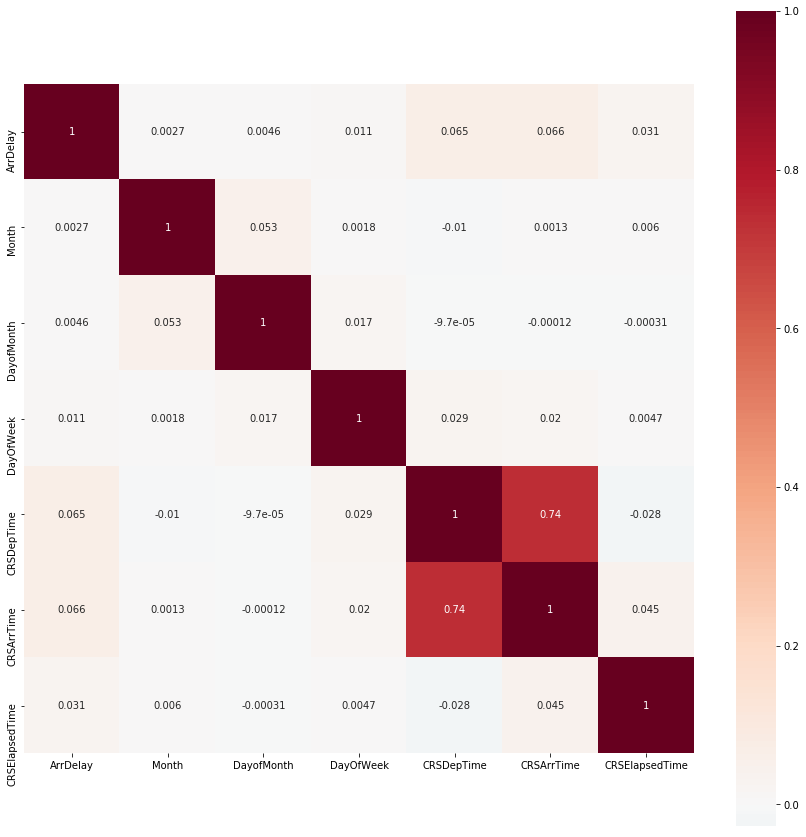

In [11]:
corr_cols = ['ArrDelay','Month', 'DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','CRSElapsedTime']
plt.figure(figsize=(15,15))
sns.heatmap(airline_data[corr_cols].corr(), square=True, annot=True, center=0, cmap='RdBu_r')
plt.show()

In [12]:
# Drop CRSArrTime as it is highly coorelated with CRSDepTime

airline_data.drop('CRSArrTime', axis=1, inplace=True)

In [13]:
# Calculate the percentage of success data (ArrDelay > 30 minutes) with respect to the failure data (normal arrivals)

delayed_arrivals = (airline_data['ArrDelay'] > 30).sum()
print('Delayed Arrivals are {}'.format(delayed_arrivals))

total_records = len(airline_data['ArrDelay'])
print('Total of all arrivals {}'.format(total_records))

print('The percentage of delayed arrivals is {}%'.format(round(delayed_arrivals / total_records * 100), 2))

Delayed Arrivals are 849331
Total of all arrivals 2048999
The percentage of delayed arrivals is 41.0%


In [14]:
airline_data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [15]:
# Drop the rows such as CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay

airline_data.drop(['CarrierDelay'], axis=1, inplace=True)
airline_data.drop(['WeatherDelay'], axis=1, inplace=True)
airline_data.drop(['NASDelay'], axis=1, inplace=True)
airline_data.drop(['SecurityDelay'], axis=1, inplace=True)
airline_data.drop(['LateAircraftDelay'], axis=1, inplace=True)

In [16]:
# Drop the columns Cancelled, Diverted and FlightNum

airline_data.drop(['Cancelled'], axis=1, inplace=True)
airline_data.drop(['Diverted'], axis=1, inplace=True)
airline_data.drop(['FlightNum'], axis=1, inplace=True)

In [17]:
# Create our feature set and label data

X = airline_data.drop(['ArrDelay'], axis=1)
y = airline_data['ArrDelay']

In [18]:
print(airline_data.shape)

(2048999, 15)


#Undersample our majority data using RandomUnderSampler due to imbalance in the data sets

from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = under_sample.fit_resample(X, y)

#Print the dataset statistis after resampling

delayed_arrivals = (y_resampled > 30).sum()
print('Delayed Arrivals after resampling are {}'.format(delayed_arrivals))

total_records = len(y_resampled)
print('Total of all arrivals, after resampling is {}'.format(total_records))

print('The percentage of delayed arrivals, after resampling, is {}%'.
      format(round(delayed_arrivals / total_records * 100), 2))

In [19]:
# Split the resampled data set

from sklearn.model_selection import train_test_split

# test_size: The split between test and train is 2/3 to 1/3 approximately

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
X_train.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [21]:
# Check the length of training and testing sets

print('Length of training feature set is {}'.format(len(X_train)))
print('Length of testing feature set is {}'.format(len(X_test)))
delayed_arrivals = (y > 30).sum()
print('Delayed Arrivals after split are: {}'.format((y_train > 30).sum()))

Length of training feature set is 1372829
Length of testing feature set is 676170
Delayed Arrivals after split are: 569355


In [22]:
X_train.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,1372829.0,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06,1.372829e+06
mean,2008.0,6.095780e+00,1.573754e+01,3.970632e+00,1.496122e+03,1.448474e+03,1.593330e+03,1.334670e+02,1.313946e+02,1.074285e+02,3.998201e+01,7.467934e+02,7.019452e+00,1.901909e+01
std,0.0,3.471077e+00,8.769653e+00,1.990298e+00,4.578738e+02,4.323821e+02,5.455156e+02,7.270957e+01,7.045672e+01,6.900309e+01,5.310055e+01,5.670576e+02,5.504882e+00,1.471082e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,9.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.142000e+03,1.116000e+03,1.257000e+03,8.000000e+01,8.000000e+01,5.700000e+01,9.000000e+00,3.340000e+02,4.000000e+00,1.100000e+01
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.530000e+03,1.456000e+03,1.701000e+03,1.150000e+02,1.140000e+02,8.900000e+01,2.200000e+01,5.940000e+02,6.000000e+00,1.500000e+01
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.853000e+03,1.810000e+03,2.023000e+03,1.650000e+02,1.610000e+02,1.360000e+02,5.000000e+01,9.800000e+02,8.000000e+00,2.200000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.467000e+03,4.962000e+03,2.250000e+02,4.220000e+02


In [ ]:
# Run SGDRegressor model with a linear kernel on the reduced training data set

from sklearn import linear_model

sgd = linear_model.SGDRegressor(penalty='l1', alpha=0.1, max_iter=1000, tol=1e-3)

sgd.fit(X_train, y_train)

predicted_values = sgd.predict(X_train)

sgd.score(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1219: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#Plot the training data versus predicted values

plt.xlabel('Original Data')
plt.ylabel('Predicted Data')
plt.title('Arrival Delays Analysis')
plt.plot(y_train, predicted_values)

In [25]:
predicted_values

array([-3.99815338e+14, -1.22423033e+14,  1.12577983e+14, ...,
       -4.03064449e+14, -2.32215582e+14, -8.84730664e+13])